# Practice Assignment: Understanding Distributions Through Sampling

** *This assignment is optional, and I encourage you to share your solutions with me and your peers in the discussion forums!* **


To complete this assignment, create a code cell that:
* Creates a number of subplots using the `pyplot subplots` or `matplotlib gridspec` functionality.
* Creates an animation, pulling between 100 and 1000 samples from each of the random variables (`x1`, `x2`, `x3`, `x4`) for each plot and plotting this as we did in the lecture on animation.
* **Bonus:** Go above and beyond and "wow" your classmates (and me!) by looking into matplotlib widgets and adding a widget which allows for parameterization of the distributions behind the sampling animations.


Tips:
* Before you start, think about the different ways you can create this visualization to be as interesting and effective as possible.
* Take a look at the histograms below to get an idea of what the random variables look like, as well as their positioning with respect to one another. This is just a guide, so be creative in how you lay things out!
* Try to keep the length of your animation reasonable (roughly between 10 and 30 seconds).

In [1]:
import ipympl
import matplotlib.pyplot as plt
import numpy as np

In [2]:
%matplotlib notebook

<IPython.core.display.Javascript object>


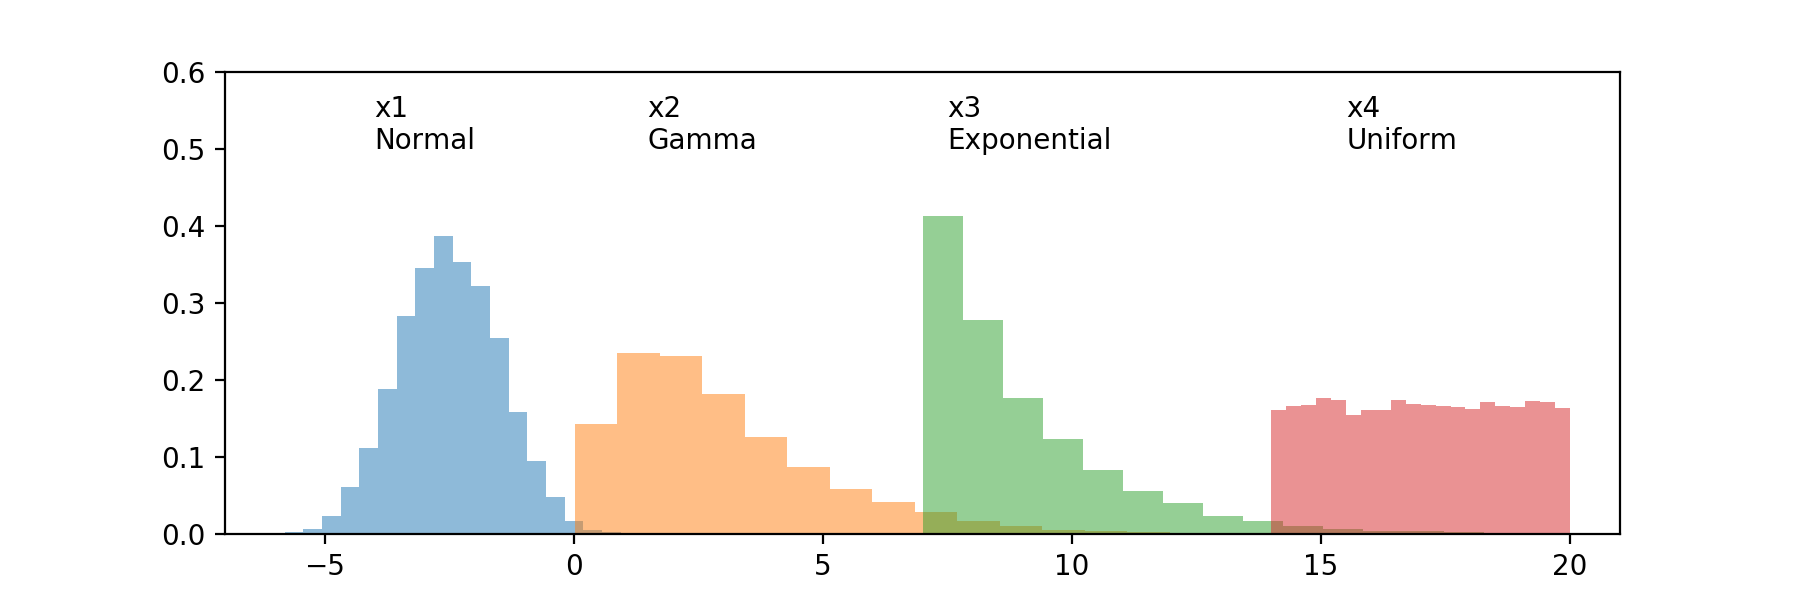

In [3]:
# generate 4 random variables from the random, gamma, exponential, and uniform distributions
x1 = np.random.normal(-2.5, 1, 10000)
x2 = np.random.gamma(2, 1.5, 10000)
x3 = np.random.exponential(2, 10000)+7
x4 = np.random.uniform(14,20, 10000)

# plot the histograms
plt.figure(figsize=(9,3))
plt.hist(x1, density=True, bins=20, alpha=0.5)
plt.hist(x2, density=True, bins=20, alpha=0.5)
plt.hist(x3, density=True, bins=20, alpha=0.5)
plt.hist(x4, density=True, bins=20, alpha=0.5);
plt.axis([-7,21,0,0.6])

_ = plt.text(x1.mean()-1.5, 0.5, 'x1\nNormal')
_ = plt.text(x2.mean()-1.5, 0.5, 'x2\nGamma')
_ = plt.text(x3.mean()-1.5, 0.5, 'x3\nExponential')
_ = plt.text(x4.mean()-1.5, 0.5, 'x4\nUniform')

<IPython.core.display.Javascript object>


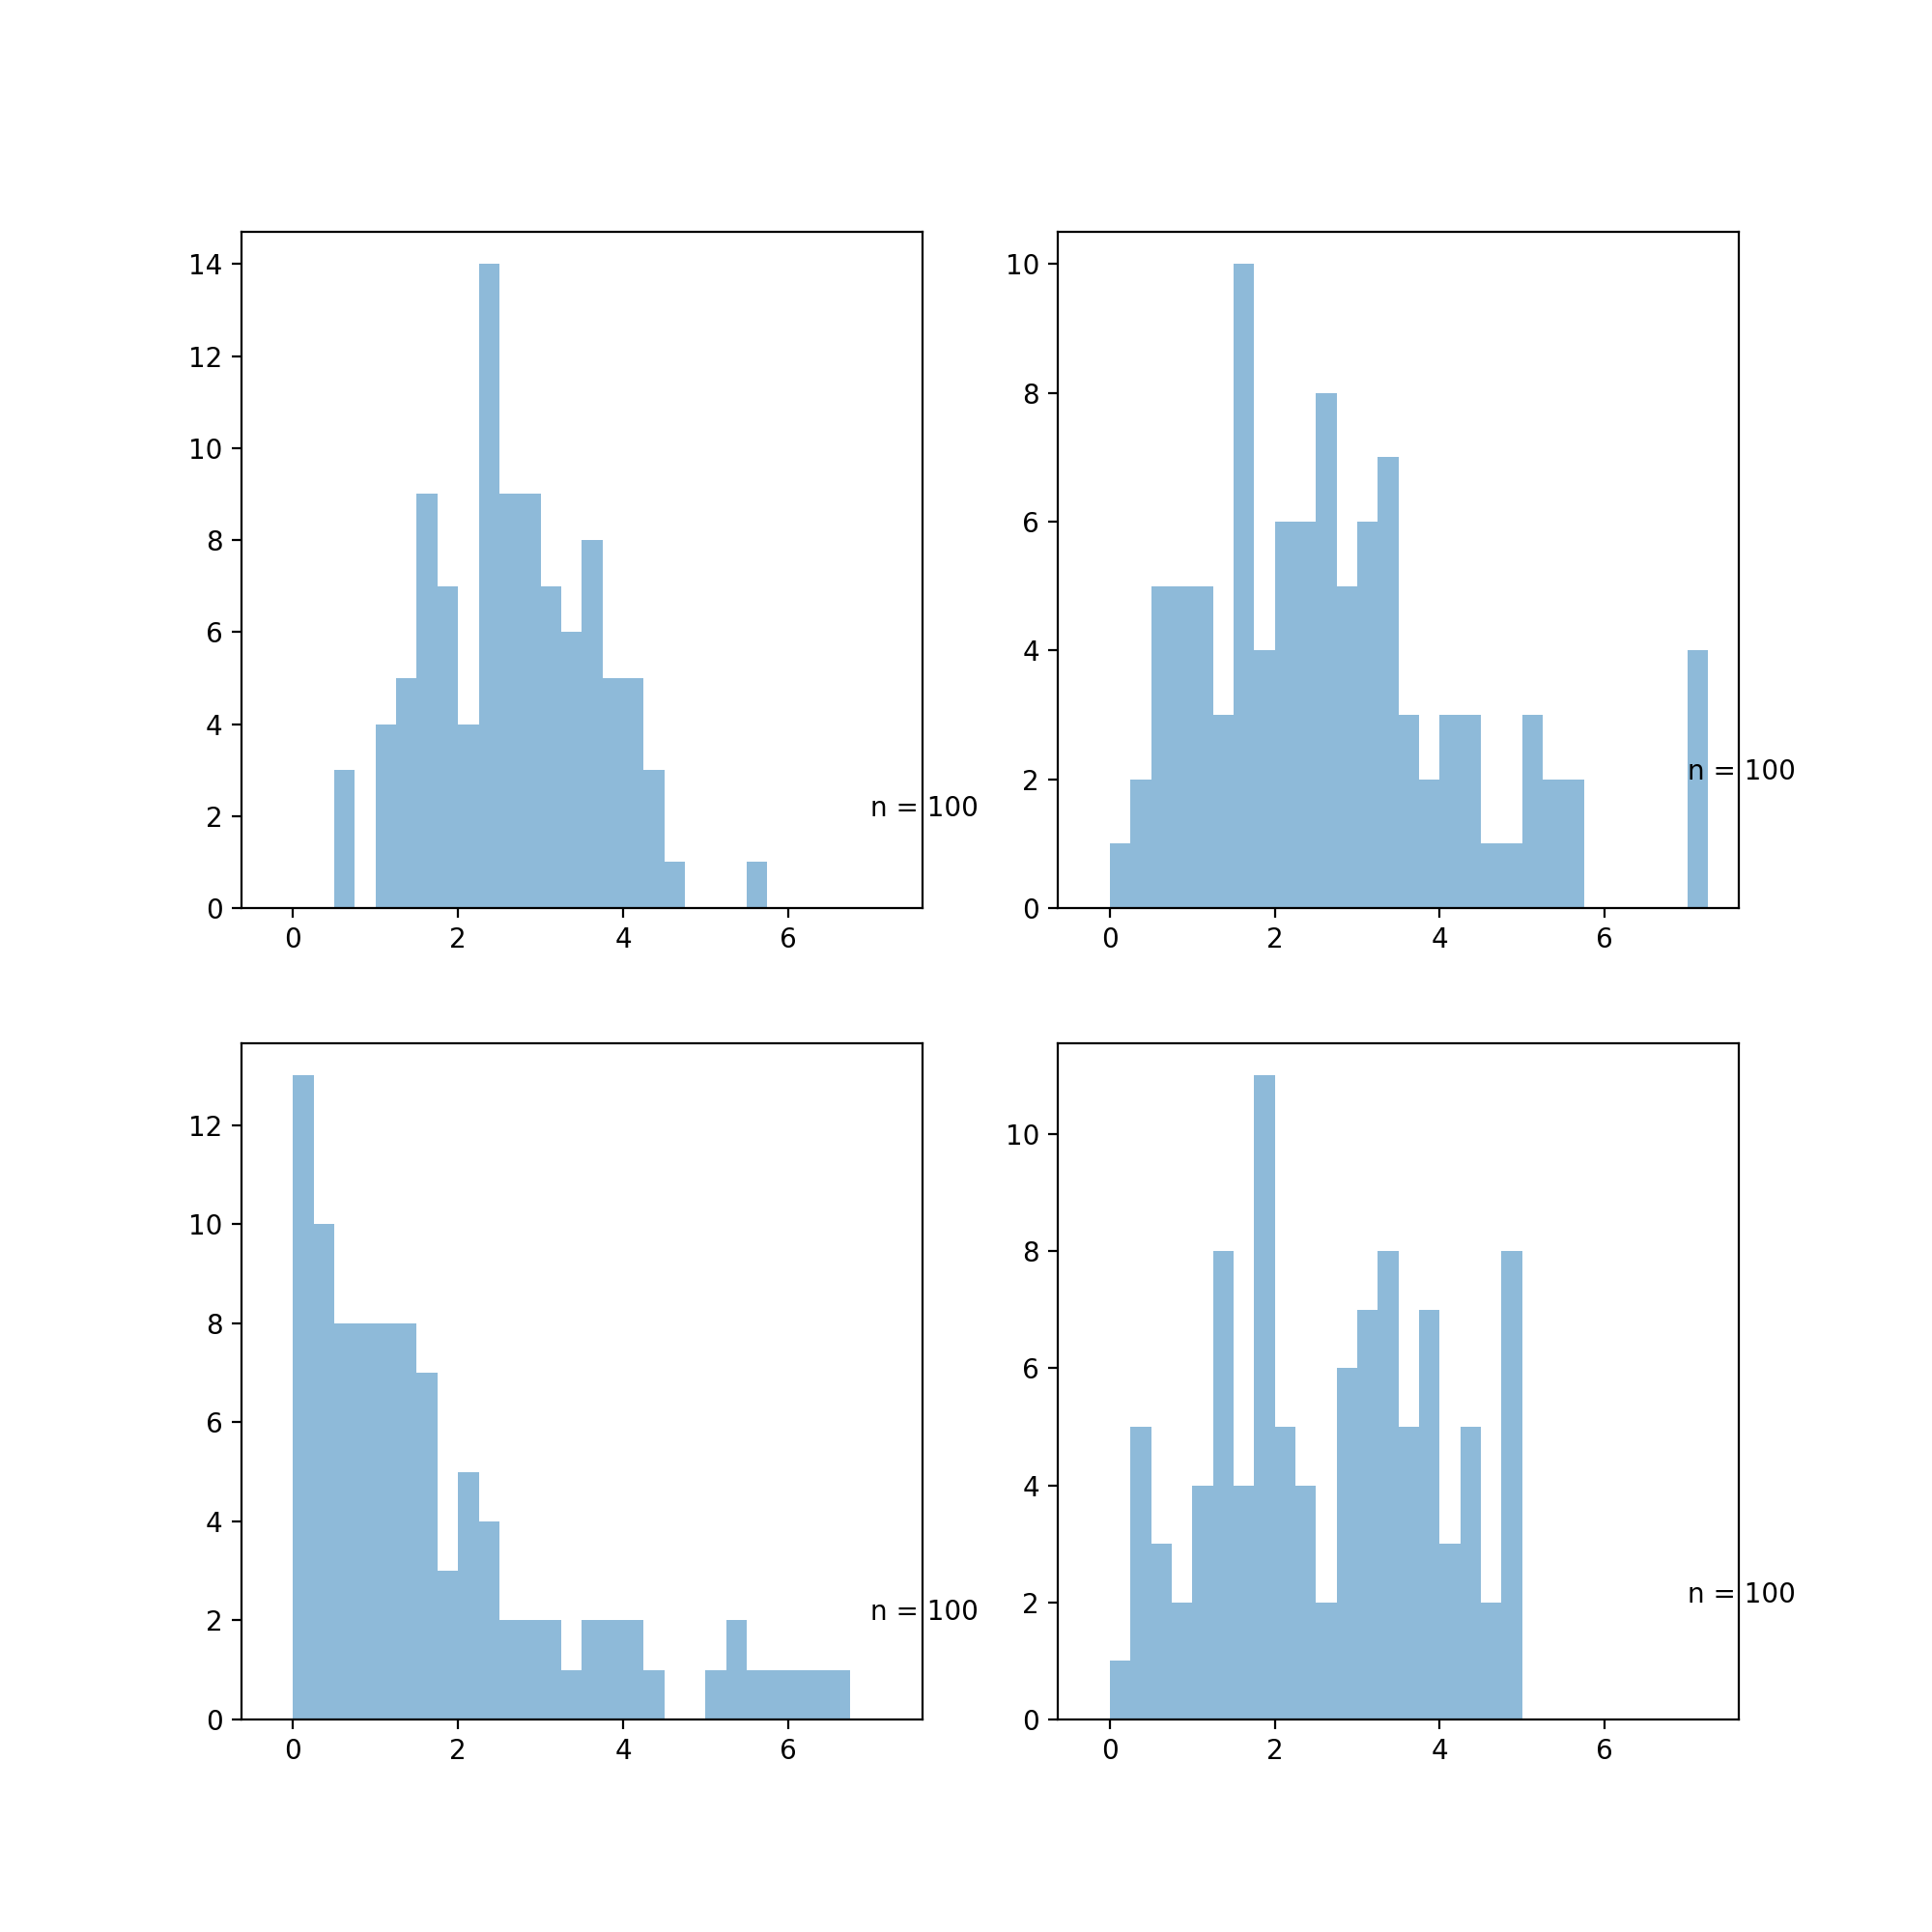

In [4]:
import matplotlib.gridspec as gridspec
import matplotlib.animation as animation

n = 100
x1 = np.random.normal(2.5, 1, n)
x2 = np.random.gamma(2, 1.5, n)
x3 = np.random.exponential(2, n)
x4 = np.random.uniform(0, 5, n)

fig = plt.figure(figsize=(10, 10))
gspec = gridspec.GridSpec(2, 2)

top_left = plt.subplot(gspec[0, 0])
top_right = plt.subplot(gspec[0, 1])
bottom_left = plt.subplot(gspec[1, 0])
bottom_right = plt.subplot(gspec[1, 1])

bins = np.arange(-.25, 7.5, 0.25)
axes_and_values = [
    (top_left, x1),
    (top_right, x2),
    (bottom_left, x3),
    (bottom_right, x4)
]

# create the function that will do the plotting, where curr is the current frame
def update(curr):
    # check if animation is at the last frame, and if so, stop the animation a
    if curr == n:
        a.event_source.stop()
    for ax, x in axes_and_values:
        ax.cla()
        ax.hist(x[:curr], bins=bins, alpha=0.5)
        ax.annotate('n = {}'.format(curr), [7,2])
    
a = animation.FuncAnimation(fig, update, interval=n)